In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
import bamboolib

In [145]:
housing = pd.read_csv('train_housing.csv', index_col=0)
housing.shape

(2064, 81)

In [3]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [4]:
categorical = [f for f in housing.columns if housing.dtypes[f] == 'object']

for feature in categorical:
    print(housing[feature].value_counts())
    print('')

RL         1609
RM          329
FV           94
RH           15
C (all)      14
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

Pave    2056
Grvl       8
Name: Street, dtype: int64

Grvl    79
Pave    51
Name: Alley, dtype: int64

Reg    1313
IR1     685
IR2      55
IR3      11
Name: LotShape, dtype: int64

Lvl    1864
HLS      78
Bnk      75
Low      47
Name: LandContour, dtype: int64

AllPub    2063
NoSewr       1
Name: Utilities, dtype: int64

Inside     1523
Corner      342
CulDSac     130
FR2          58
FR3          11
Name: LotConfig, dtype: int64

Gtl    1963
Mod      88
Sev      13
Name: LandSlope, dtype: int64

NAmes      330
CollgCr    189
OldTown    173
Edwards    137
Somerst    121
Gilbert    113
Sawyer     104
NWAmes      98
SawyerW     91
Mitchel     87
NridgHt     86
BrkSide     80
Crawfor     71
IDOTRR      65
NoRidge     58
Timber      43
ClearCr     39
StoneBr     34
SWISU       32
MeadowV     23
BrDale      22
Veenker     20
NPkVill     15
Blmngtn     

<AxesSubplot:>

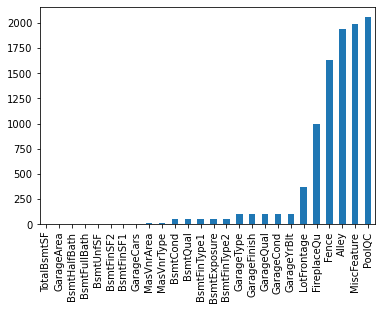

In [5]:
missing = housing.isnull().sum()
missing = missing[missing >0]
missing.sort_values().plot.bar()

<AxesSubplot:xlabel='SalePrice'>

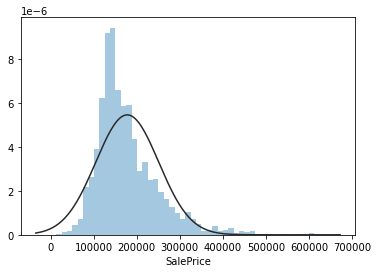

In [6]:
sns.distplot(housing['SalePrice'], kde=False, fit=stats.norm)

<AxesSubplot:xlabel='SalePrice'>

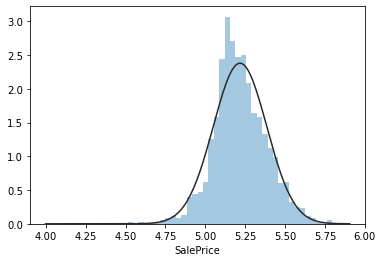

In [7]:
logprice = np.log10(housing['SalePrice'])
sns.distplot(logprice, kde=False, fit=stats.norm)

# Size

In [18]:
size_related = housing.filter(regex='SF$|Area$')
size_related.head()

,GrLivArea,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
754,1040,11200,0.0,134.0,1040.0,1040,0,0,384.0,0,0,0
404,986,6180,0.0,960.0,960.0,986,0,0,180.0,0,128,0
697,1728,9100,336.0,396.0,1728.0,1728,0,0,504.0,0,0,0
538,1710,10300,0.0,576.0,576.0,902,808,0,480.0,12,11,0
606,1468,10440,0.0,54.0,1468.0,1468,0,0,528.0,0,102,0


In [9]:
size_related.isnull().sum(axis=0)

GrLivArea        0
LotArea          0
MasVnrArea      11
BsmtUnfSF        1
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GarageArea       1
WoodDeckSF       0
OpenPorchSF      0
PoolArea         0
dtype: int64

In [10]:
size_related = size_related.fillna(0.0)  # We fill the very minor missing values by 0.0
F_values, p_values = f_regression(size_related, housing['SalePrice'])

pd.Series(p_values, index=size_related.columns).sort_values()

GrLivArea        0.000000e+00
TotalBsmtSF     1.164586e-246
1stFlrSF        1.073583e-237
GarageArea      1.494652e-227
MasVnrArea      1.999293e-121
WoodDeckSF       6.979717e-57
OpenPorchSF      1.256946e-48
2ndFlrSF         7.137331e-40
LotArea          1.022096e-31
BsmtUnfSF        3.784346e-12
LowQualFinSF     2.181227e-01
PoolArea         3.654623e-01
dtype: float64

<AxesSubplot:>

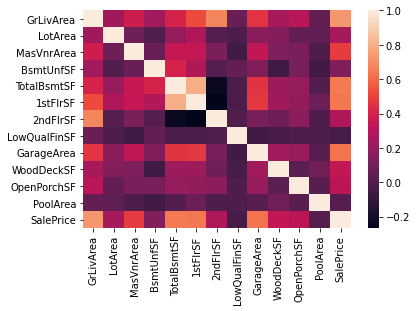

In [16]:
corr1 = pd.concat([size_related, housing['SalePrice']], axis=1).corr()
sns.heatmap(corr1)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

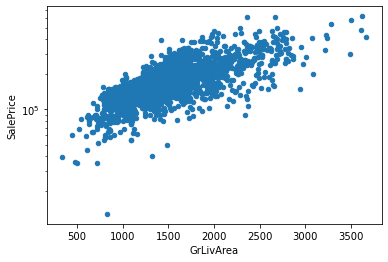

In [14]:
housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice', logx=False, logy=True)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

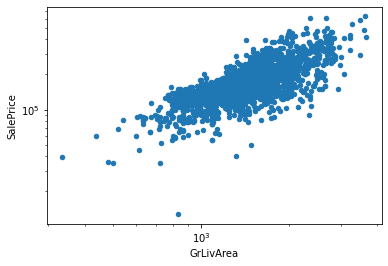

In [15]:
housing[['GrLivArea', 'SalePrice']].plot(kind='scatter', x='GrLivArea', y='SalePrice', logx=True, logy=True)

# Garage

In [20]:
garage_related = housing.filter(regex='Garage')
garage_related.head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
754,Detchd,1965.0,Unf,1.0,384.0,TA,TA
404,Detchd,1926.0,Unf,1.0,180.0,TA,TA
697,Detchd,1963.0,Unf,2.0,504.0,TA,TA
538,Detchd,1990.0,Unf,2.0,480.0,TA,TA
606,Attchd,2005.0,Fin,2.0,528.0,TA,TA


In [21]:
garage_related.isnull().sum(axis=0)

GarageType      101
GarageYrBlt     102
GarageFinish    102
GarageCars        1
GarageArea        1
GarageQual      102
GarageCond      102
dtype: int64

In [ ]:
F_values, p_values = f_regression(size_related, housing['SalePrice'])

pd.Series(p_values, index=size_related.columns).sort_values()

In [32]:
garage_related['GarageCars'] = garage_related['GarageCars'].fillna(0.0)
garage_related['GarageArea'] = garage_related['GarageArea'].fillna(0.0)
garage_cars_area = garage_related.filter(regex='Cars$|Area$')
garage_cars_area.isnull().sum()

GarageCars    0
GarageArea    0
dtype: int64

In [33]:
F_values, p_values = f_regression(garage_cars_area, housing['SalePrice'])

pd.Series(p_values, index=garage_cars_area.columns).sort_values()

GarageCars    5.432335e-231
GarageArea    1.494652e-227
dtype: float64

<AxesSubplot:>

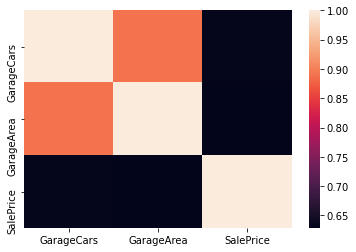

In [37]:
corr2 = pd.concat([garage_cars_area, housing['SalePrice']], axis=1).corr()
sns.heatmap(corr2)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

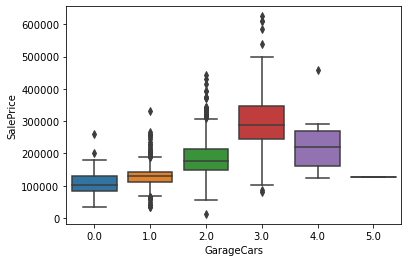

In [45]:
sns.boxplot(x='GarageCars', y='SalePrice', data=housing)

In [36]:
housing['GarageType'].value_counts()

Attchd     1227
Detchd      566
BuiltIn     124
Basment      19
2Types       18
CarPort       9
Name: GarageType, dtype: int64

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

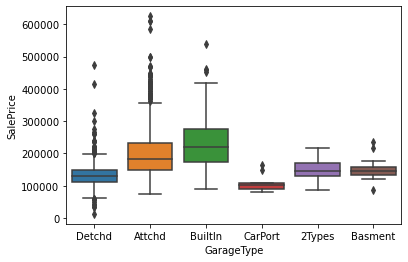

In [34]:
sns.boxplot(x='GarageType', y='SalePrice', data=housing)

In [38]:
housing['GarageFinish'].value_counts()

Unf    896
RFn    584
Fin    482
Name: GarageFinish, dtype: int64

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

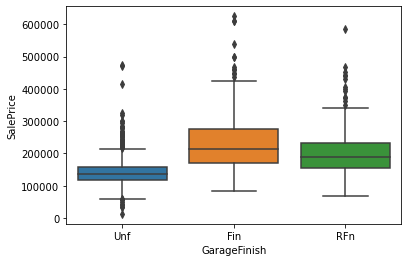

In [39]:
sns.boxplot(x='GarageFinish', y='SalePrice', data=housing)

In [40]:
housing['GarageQual'].value_counts()

TA    1850
Fa      89
Gd      18
Ex       3
Po       2
Name: GarageQual, dtype: int64

<AxesSubplot:xlabel='GarageQual', ylabel='SalePrice'>

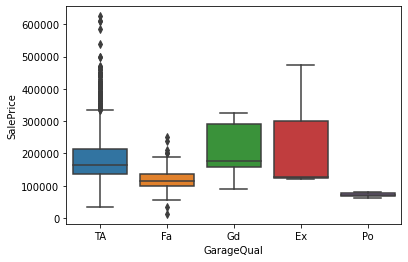

In [41]:
sns.boxplot(x='GarageQual', y='SalePrice', data=housing)

In [42]:
housing['GarageCond'].value_counts()

TA    1882
Fa      58
Gd      12
Po       7
Ex       3
Name: GarageCond, dtype: int64

<AxesSubplot:xlabel='GarageCond', ylabel='SalePrice'>

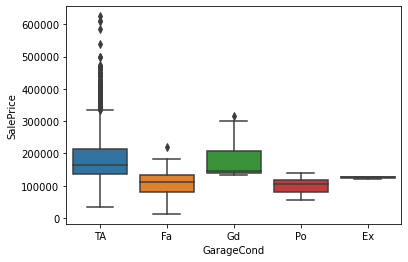

In [43]:
sns.boxplot(x='GarageCond', y='SalePrice', data=housing)

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

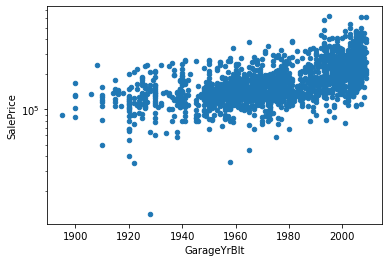

In [44]:
housing[['GarageYrBlt', 'SalePrice']].plot(kind='scatter', x='GarageYrBlt', y='SalePrice', logx=False, logy=True)

# Porch

In [48]:
porch_related = housing.filter(regex='Porch')
porch_related.head()

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
754,0,0,0,0
404,128,0,0,0
697,0,0,0,0
538,11,64,0,0
606,102,0,0,216


In [49]:
porch_related.isnull().sum(axis=0)

OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
dtype: int64

In [50]:
F_values, p_values = f_regression(porch_related, housing['SalePrice'])

pd.Series(p_values, index=porch_related.columns).sort_values()

OpenPorchSF      1.256946e-48
EnclosedPorch    2.794117e-08
ScreenPorch      1.854039e-05
3SsnPorch        3.522185e-01
dtype: float64

<AxesSubplot:>

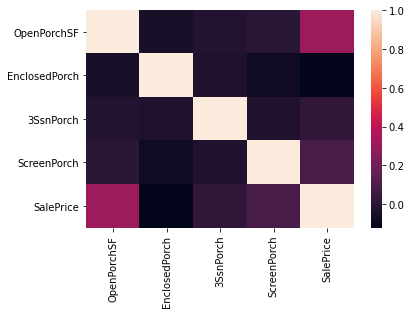

In [51]:
corr3 = pd.concat([porch_related, housing['SalePrice']], axis=1).corr()
sns.heatmap(corr3)

# Lot

In [52]:
lot_related = housing.filter(regex='Lot')
lot_related.head()

,LotFrontage,LotArea,LotShape,LotConfig
754,70.0,11200,Reg,Inside
404,60.0,6180,Reg,Corner
697,70.0,9100,Reg,Inside
538,50.0,10300,IR1,Inside
606,84.0,10440,Reg,Corner


In [53]:
lot_related.isnull().sum(axis=0)

LotFrontage    374
LotArea          0
LotShape         0
LotConfig        0
dtype: int64

<AxesSubplot:>

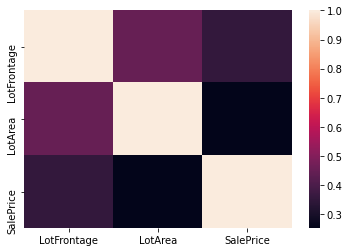

In [54]:
corr4 = pd.concat([lot_related, housing['SalePrice']], axis=1).corr()
sns.heatmap(corr4)

In [55]:
housing['LotShape'].value_counts()

Reg    1313
IR1     685
IR2      55
IR3      11
Name: LotShape, dtype: int64

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

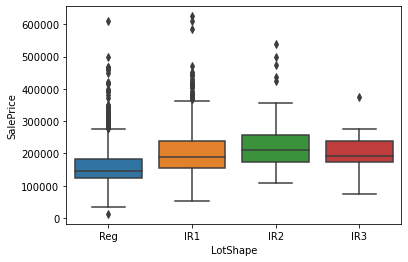

In [56]:
sns.boxplot(x='LotShape', y='SalePrice', data=housing)

In [57]:
housing['LotConfig'].value_counts()

Inside     1523
Corner      342
CulDSac     130
FR2          58
FR3          11
Name: LotConfig, dtype: int64

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

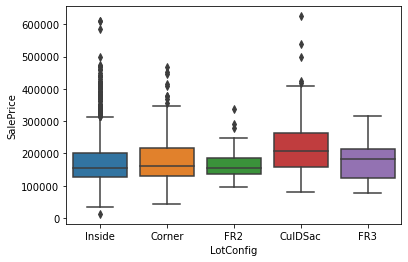

In [58]:
sns.boxplot(x='LotConfig', y='SalePrice', data=housing)

# Bath

In [60]:
bath_related = housing.filter(regex='Bath')
bath_related.head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
754,1.0,0.0,1,0
404,0.0,0.0,1,0
697,1.0,0.0,2,0
538,0.0,0.0,2,0
606,1.0,0.0,2,0


In [62]:
housing['FullBath'].value_counts()

2    1053
1     964
3      37
0       7
4       3
Name: FullBath, dtype: int64

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

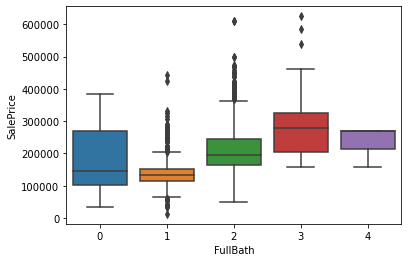

In [61]:
sns.boxplot(x='FullBath', y='SalePrice', data=housing)

In [63]:
housing['HalfBath'].value_counts()

0    1297
1     755
2      12
Name: HalfBath, dtype: int64

<AxesSubplot:xlabel='HalfBath', ylabel='SalePrice'>

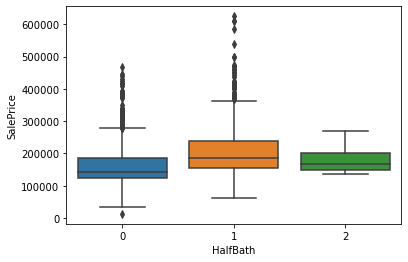

In [64]:
sns.boxplot(x='HalfBath', y='SalePrice', data=housing)

# Condition 

In [72]:
con_related = housing.filter(regex='Condition')
con_related.head()

,Condition1,Condition2,SaleCondition
754,Norm,Norm,Normal
404,Norm,Norm,Normal
697,RRAe,Norm,Abnorml
538,RRAn,Feedr,Normal
606,Norm,Norm,Normal


In [68]:
housing['SaleCondition'].value_counts()

Normal     1939
Partial      59
Abnorml      47
Family       14
Alloca        3
AdjLand       2
Name: SaleCondition, dtype: int64

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

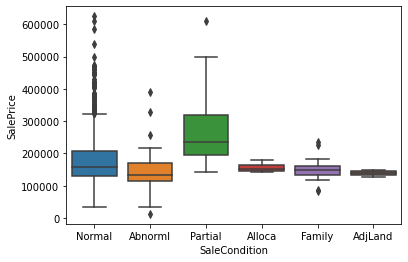

In [69]:
sns.boxplot(x='SaleCondition', y='SalePrice', data=housing)

In [74]:
housing = housing.loc[~(housing['SaleCondition'].str.contains('Family', case=False, regex=False, na=False))]

In [75]:
housing['Condition1'].value_counts()

Norm      1757
Feedr      111
Artery      72
RRAn        36
PosN        30
RRAe        21
PosA        13
RRNn         6
RRNe         4
Name: Condition1, dtype: int64

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

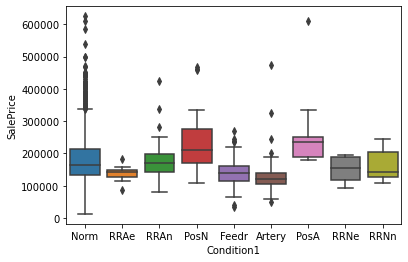

In [77]:
sns.boxplot(x='Condition1', y='SalePrice', data=housing)

In [78]:
housing['Condition2'].value_counts()

Norm      2033
Feedr        9
RRNn         2
PosN         2
PosA         2
Artery       2
Name: Condition2, dtype: int64

# Exter

In [79]:
exter_related = housing.filter(regex='Exter')
exter_related.head()

,Exterior1st,Exterior2nd,ExterQual,ExterCond
754,HdBoard,HdBoard,TA,TA
404,Wd Sdng,Wd Sdng,TA,TA
697,HdBoard,HdBoard,TA,TA
538,Stucco,Stucco,TA,TA
606,VinylSd,VinylSd,Gd,TA


In [80]:
housing['ExterCond'].value_counts()

TA    1765
Gd     227
Fa      47
Ex      10
Po       1
Name: ExterCond, dtype: int64

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

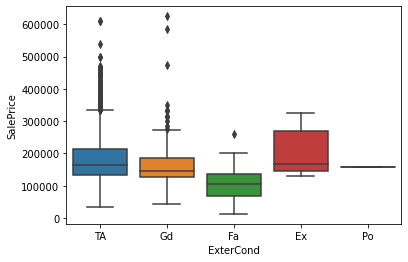

In [81]:
sns.boxplot(x='ExterCond', y='SalePrice', data=housing)

In [84]:
housing['ExterQual'].value_counts()

TA    1294
Gd     679
Ex      51
Fa      26
Name: ExterQual, dtype: int64

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

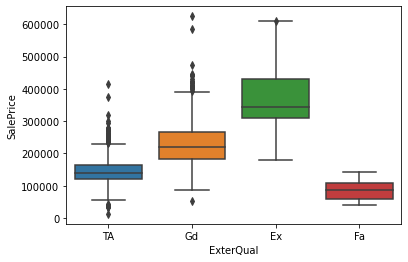

In [85]:
sns.boxplot(x='ExterQual', y='SalePrice', data=housing)

In [86]:
housing['Exterior1st'].value_counts()

VinylSd    673
HdBoard    336
MetalSd    331
Wd Sdng    319
Plywood    151
CemntBd     81
BrkFace     55
WdShing     42
AsbShng     26
Stucco      26
BrkComm      5
CBlock       2
AsphShn      1
ImStucc      1
PreCast      1
Name: Exterior1st, dtype: int64

[Text(0, 0, 'HdBoard'),
 Text(1, 0, 'Wd Sdng'),
 Text(2, 0, 'Stucco'),
 Text(3, 0, 'VinylSd'),
 Text(4, 0, 'BrkFace'),
 Text(5, 0, 'MetalSd'),
 Text(6, 0, 'BrkComm'),
 Text(7, 0, 'CemntBd'),
 Text(8, 0, 'Plywood'),
 Text(9, 0, 'AsbShng'),
 Text(10, 0, 'WdShing'),
 Text(11, 0, 'CBlock'),
 Text(12, 0, 'PreCast'),
 Text(13, 0, 'AsphShn'),
 Text(14, 0, 'ImStucc')]

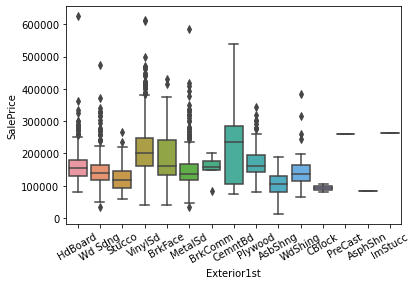

In [90]:
ax = sns.boxplot(x='Exterior1st', y='SalePrice', data=housing)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

# Fireplace

In [91]:
Fire_related = housing.filter(regex='Fire')
Fire_related.head()

,Fireplaces,FireplaceQu
754,0,NaN
404,1,Gd
697,0,NaN
538,0,NaN
606,1,Gd


In [92]:
housing['Fireplaces'].value_counts()

0    988
1    901
2    152
3      8
4      1
Name: Fireplaces, dtype: int64

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

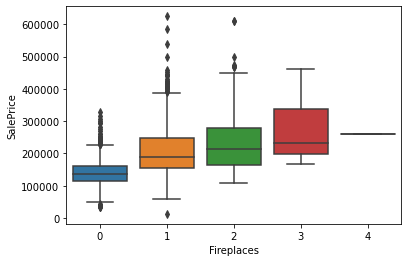

In [93]:
sns.boxplot(x='Fireplaces', y='SalePrice', data=housing)

In [94]:
housing['FireplaceQu'].value_counts()

Gd    485
TA    458
Fa     57
Po     34
Ex     28
Name: FireplaceQu, dtype: int64

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

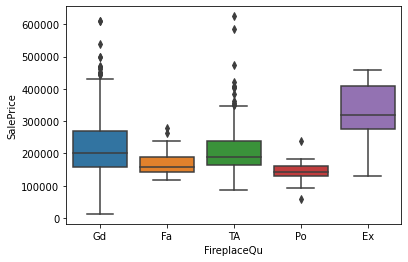

In [95]:
sns.boxplot(x='FireplaceQu', y='SalePrice', data=housing)

# Kitchen

In [98]:
kit_related = housing.filter(regex='Kitchen')
kit_related.head()

,KitchenAbvGr,KitchenQual
754,1,TA
404,1,TA
697,2,TA
538,1,TA
606,1,Gd


In [99]:
housing['KitchenAbvGr'].value_counts()

1    1971
2      76
0       2
3       1
Name: KitchenAbvGr, dtype: int64

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

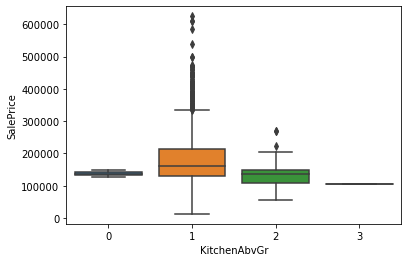

In [100]:
sns.boxplot(x='KitchenAbvGr', y='SalePrice', data=housing)

In [101]:
housing['KitchenQual'].value_counts()

TA    1065
Gd     827
Ex     108
Fa      49
Po       1
Name: KitchenQual, dtype: int64

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

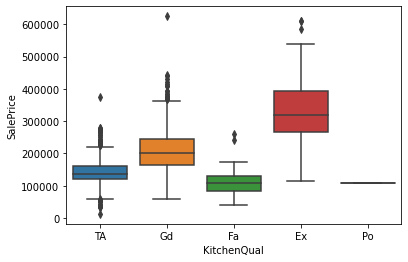

In [102]:
sns.boxplot(x='KitchenQual', y='SalePrice', data=housing)

In [ ]:
Conclusion:
Keep: KitchenQual

# Heating/AC

In [103]:
heat_related = housing.filter(regex='Heating')
heat_related.head()

,Heating,HeatingQC
754,GasA,Ex
404,GasA,TA
697,GasA,TA
538,GasA,Gd
606,GasA,Ex


In [104]:
housing['Heating'].value_counts()

GasA     2022
GasW       19
Grav        4
Wall        3
OthW        1
Floor       1
Name: Heating, dtype: int64

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

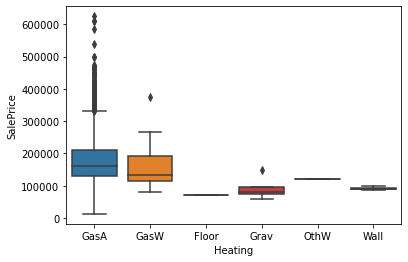

In [105]:
sns.boxplot(x='Heating', y='SalePrice', data=housing)

In [106]:
housing['HeatingQC'].value_counts()

Ex    1026
TA     613
Gd     352
Fa      58
Po       1
Name: HeatingQC, dtype: int64

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

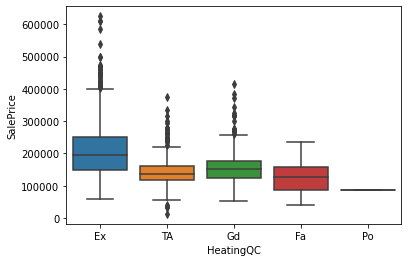

In [107]:
sns.boxplot(x='HeatingQC', y='SalePrice', data=housing)

In [108]:
housing['CentralAir'].value_counts()

Y    1925
N     125
Name: CentralAir, dtype: int64

<AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>

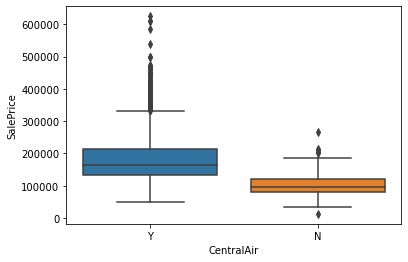

In [109]:
sns.boxplot(x='CentralAir', y='SalePrice', data=housing)

In [ ]:
Conclusion:
Keep: HeatingQC, CentralAir

# Roof

In [110]:
roof_related = housing.filter(regex='Roof')
roof_related.head()

,RoofStyle,RoofMatl
754,Hip,CompShg
404,Gable,CompShg
697,Gable,CompShg
538,Gable,CompShg
606,Gable,CompShg


In [111]:
housing['RoofMatl'].value_counts()

CompShg    2018
Tar&Grv      16
WdShake       7
WdShngl       6
Metal         1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64

In [113]:
housing['RoofStyle'].value_counts()

Gable      1645
Hip         364
Gambrel      17
Flat         15
Mansard       6
Shed          3
Name: RoofStyle, dtype: int64

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

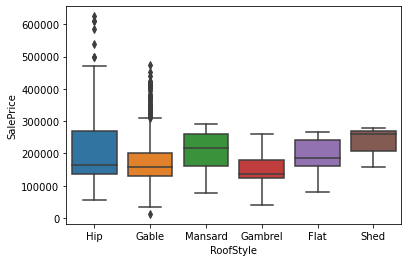

In [114]:
sns.boxplot(x='RoofStyle', y='SalePrice', data=housing)

# Year/Month

<AxesSubplot:xlabel='MoSold'>

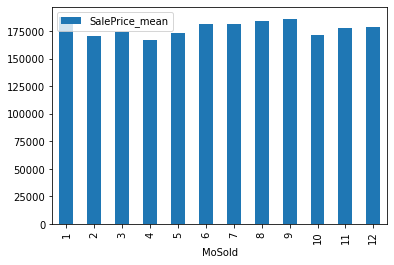

In [116]:
housing_mo = housing.groupby(['MoSold']).agg(MoSold_size=('MoSold', 'size'), SalePrice_mean=('SalePrice', 'mean')).reset_index()
housing_mo.plot.bar(x='MoSold', y='SalePrice_mean')

<AxesSubplot:xlabel='MoSold'>

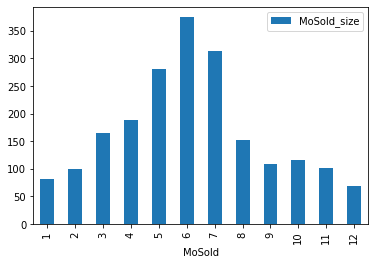

In [119]:
housing_mo.plot.bar(x='MoSold', y='MoSold_size')

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice_mean'>

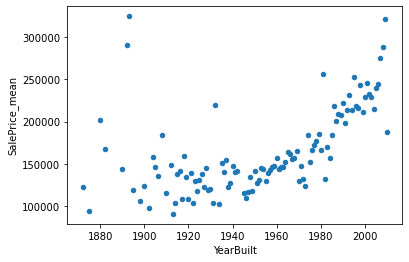

In [124]:
housing_yr = housing.groupby(['YearBuilt']).agg(SalePrice_mean=('SalePrice', 'mean')).reset_index()
housing_yr.plot.scatter(x='YearBuilt', y='SalePrice_mean')

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice_mean'>

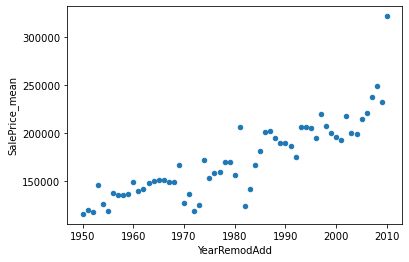

In [126]:
housing_rem = housing.groupby(['YearRemodAdd']).agg(SalePrice_mean=('SalePrice', 'mean')).reset_index()
housing_rem.plot.scatter(x='YearRemodAdd', y='SalePrice_mean')

# MS

In [127]:
housing['MSSubClass'].value_counts()

20     750
60     401
50     214
120    130
30      97
70      91
160     90
80      88
90      64
190     44
85      32
75      16
45      14
180     13
40       5
150      1
Name: MSSubClass, dtype: int64

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

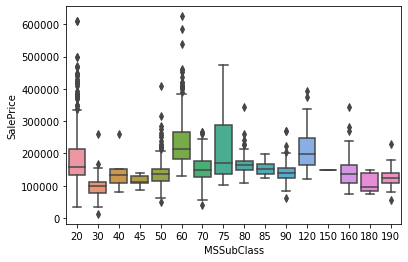

In [128]:
sns.boxplot(x='MSSubClass', y='SalePrice', data=housing)

In [129]:
housing['MSZoning'].value_counts()

RL         1599
RM          325
FV           94
RH           15
C (all)      14
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

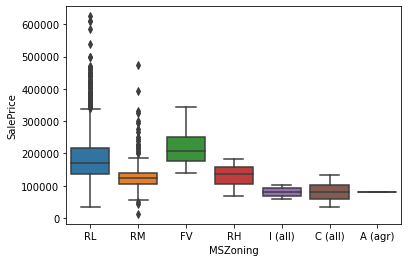

In [130]:
sns.boxplot(x='MSZoning', y='SalePrice', data=housing)

# Access

In [131]:
housing['Street'].value_counts()

Pave    2042
Grvl       8
Name: Street, dtype: int64

In [132]:
housing['Alley'].value_counts()

Grvl    79
Pave    51
Name: Alley, dtype: int64

In [191]:
housing['Alley'].isnull().sum()

1934

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

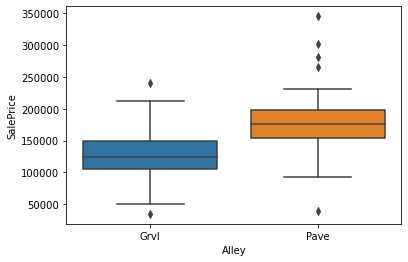

In [133]:
sns.boxplot(x='Alley', y='SalePrice', data=housing)

In [148]:
housing['PavedDrive'].value_counts()

Y    1869
N     151
P      44
Name: PavedDrive, dtype: int64

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

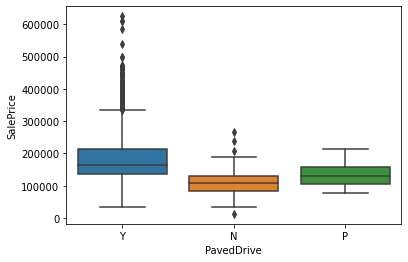

In [149]:
sns.boxplot(x='PavedDrive', y='SalePrice', data=housing)

# Land

In [134]:
land_related = housing.filter(regex='Land')
land_related.head()

,LandContour,LandSlope
754,Lvl,Gtl
404,Lvl,Gtl
697,Lvl,Gtl
538,Bnk,Gtl
606,Lvl,Gtl


In [135]:
housing['LandContour'].value_counts()

Lvl    1852
HLS      76
Bnk      75
Low      47
Name: LandContour, dtype: int64

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

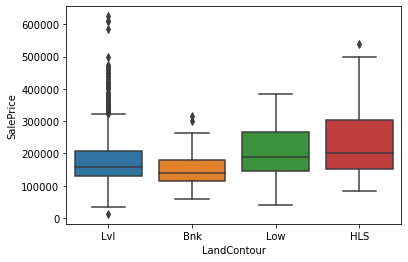

In [137]:
sns.boxplot(x='LandContour', y='SalePrice', data=housing)

In [138]:
housing['LandSlope'].value_counts()

Gtl    1951
Mod      87
Sev      12
Name: LandSlope, dtype: int64

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

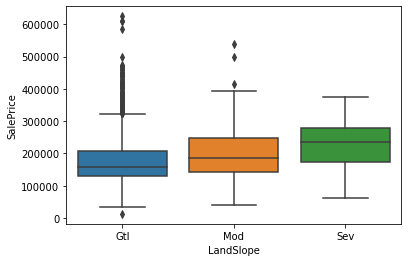

In [139]:
sns.boxplot(x='LandSlope', y='SalePrice', data=housing)

# Misc

In [140]:
misc_related = housing.filter(regex='Misc')
misc_related.head()

,MiscFeature,MiscVal
754,NaN,0
404,NaN,0
697,NaN,0
538,NaN,0
606,NaN,0


In [141]:
misc_related.isnull().sum()

MiscFeature    1978
MiscVal           0
dtype: int64

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

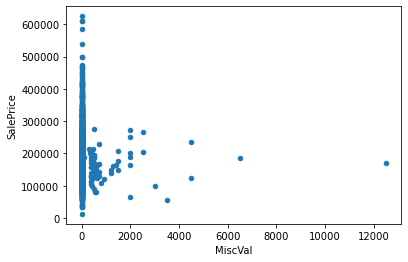

In [147]:
housing.plot.scatter(x='MiscVal', y='SalePrice')

# Neighborhood

In [151]:
housing['Neighborhood'].value_counts()

NAmes      330
CollgCr    189
OldTown    173
Edwards    137
Somerst    121
Gilbert    113
Sawyer     104
NWAmes      98
SawyerW     91
Mitchel     87
NridgHt     86
BrkSide     80
Crawfor     71
IDOTRR      65
NoRidge     58
Timber      43
ClearCr     39
StoneBr     34
SWISU       32
MeadowV     23
BrDale      22
Veenker     20
NPkVill     15
Blmngtn     15
Blueste      9
Greens       6
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

<AxesSubplot:xlabel='Neighborhood'>

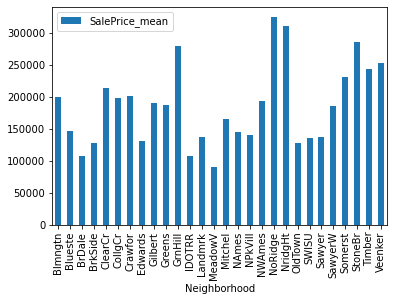

In [153]:
housing_ne = housing.groupby(['Neighborhood']).agg(SalePrice_mean=('SalePrice', 'mean')).reset_index()
housing_ne.plot.bar(x = 'Neighborhood', y = 'SalePrice_mean')

# All other features 

In [188]:
housing['Utilities'].value_counts()

AllPub    2063
NoSewr       1
Name: Utilities, dtype: int64

In [154]:
housing['BldgType'].value_counts()

1Fam      1725
TwnhsE     153
Twnhs       78
Duplex      64
2fmCon      44
Name: BldgType, dtype: int64

In [157]:
housing['BldgType'].isnull().sum()

0

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

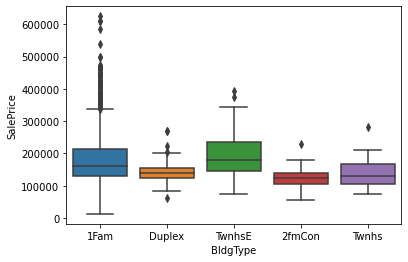

In [155]:
sns.boxplot(x='BldgType', y='SalePrice', data=housing)

In [160]:
housing['HouseStyle'].value_counts()

1Story    1027
2Story     615
1.5Fin     236
SLvl        96
SFoyer      55
2.5Unf      18
1.5Unf      14
2.5Fin       3
Name: HouseStyle, dtype: int64

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

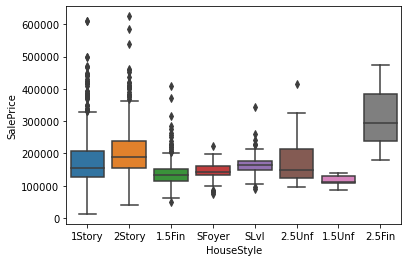

In [162]:
sns.boxplot(x='HouseStyle', y='SalePrice', data=housing)

In [163]:
housing['OverallQual'].value_counts()

5     597
6     537
7     420
8     239
4     161
9      59
3      24
10     13
2      11
1       3
Name: OverallQual, dtype: int64

<AxesSubplot:xlabel='OverallQual'>

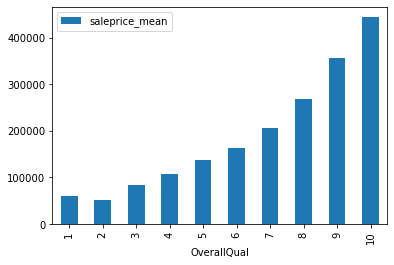

In [165]:
housing_qual = housing.groupby(['OverallQual']).agg(saleprice_mean = ('SalePrice', 'mean')).reset_index()
housing_qual.plot.bar(x = 'OverallQual', y = 'saleprice_mean')

In [167]:
housing['OverallCond'].value_counts()

5    1114
6     399
7     294
8     114
4      68
9      36
3      32
1       4
2       3
Name: OverallCond, dtype: int64

<AxesSubplot:xlabel='OverallCond'>

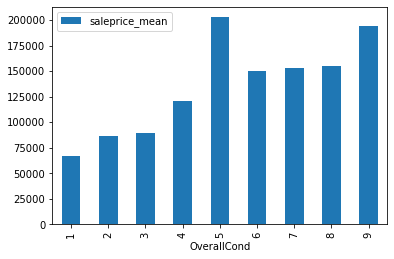

In [166]:
housing_cond = housing.groupby(['OverallCond']).agg(saleprice_mean = ('SalePrice', 'mean')).reset_index()
housing_cond.plot.bar(x = 'OverallCond', y = 'saleprice_mean')

In [168]:
housing['MasVnrType'].value_counts()

None       1258
BrkFace     636
Stone       144
BrkCmn       15
Name: MasVnrType, dtype: int64

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

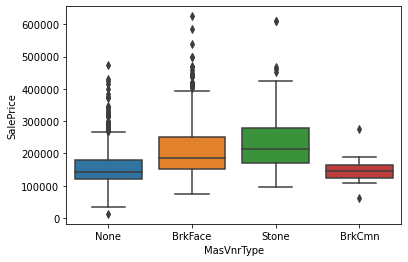

In [169]:
sns.boxplot(x='MasVnrType', y='SalePrice', data=housing)

In [170]:
housing['Foundation'].value_counts()

CBlock    924
PConc     880
BrkTil    220
Slab       30
Stone       6
Wood        4
Name: Foundation, dtype: int64

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

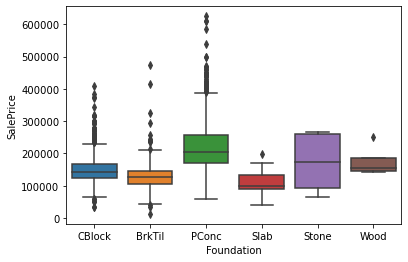

In [171]:
sns.boxplot(x='Foundation', y='SalePrice', data=housing)

In [172]:
housing['Electrical'].value_counts()

SBrkr    1898
FuseA     132
FuseF      30
FuseP       4
Name: Electrical, dtype: int64

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

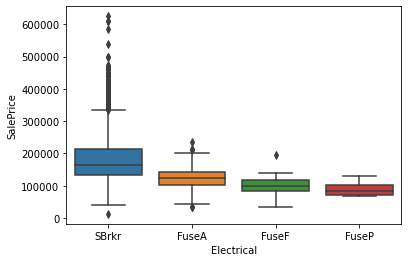

In [173]:
sns.boxplot(x='Electrical', y='SalePrice', data=housing)

In [180]:
housing['TotRmsAbvGrd'].value_counts()

6     587
7     471
5     434
8     216
4     150
9     108
10     53
3      19
11     13
12     11
2       1
13      1
Name: TotRmsAbvGrd, dtype: int64

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

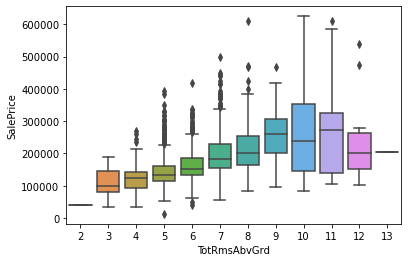

In [181]:
sns.boxplot(x='TotRmsAbvGrd', y='SalePrice', data=housing)

In [182]:
housing['Functional'].value_counts()

Typ     1916
Min2      53
Min1      48
Mod       25
Maj1      15
Maj2       6
Sal        1
Name: Functional, dtype: int64

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

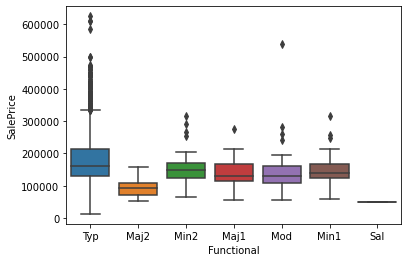

In [183]:
sns.boxplot(x='Functional', y='SalePrice', data=housing)

In [184]:
housing['Fence'].value_counts()

MnPrv    244
GdPrv     98
GdWo      82
MnWw       8
Name: Fence, dtype: int64

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

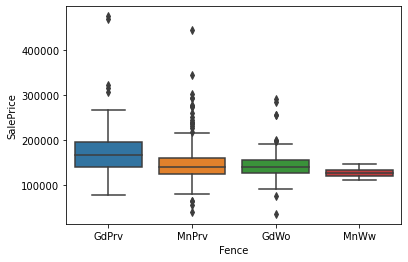

In [185]:
sns.boxplot(x='Fence', y='SalePrice', data=housing)

In [186]:
housing['SaleType'].value_counts()

WD       1915
New        57
COD        39
ConLD      21
CWD        11
ConLw       7
ConLI       6
Con         4
Oth         3
VWD         1
Name: SaleType, dtype: int64

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

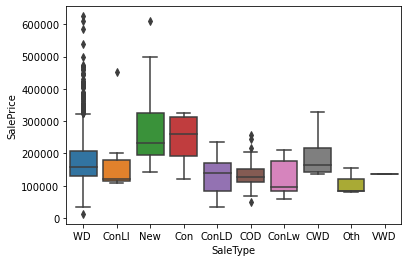

In [187]:
sns.boxplot(x='SaleType', y='SalePrice', data=housing)

In [223]:
Features = housing[['KitchenQual','HeatingQC','CentralAir','Fireplaces','YearBuilt', 'YearRemodAdd', 'YearRemodAdd', 'MSZoning', 'PavedDrive', 'Neighborhood', 'BldgType', 'OverallQual', 'Foundation', 'Electrical','Functional']]
logprice = np.log(housing['SalePrice'])

In [224]:
dummy         = pd.get_dummies(Features.KitchenQual, prefix='KitchenQual', drop_first=True)
Features = Features.drop('KitchenQual', axis=1)
Features = pd.concat([Features, dummy], axis=1)

In [225]:
dummy1         = pd.get_dummies(Features.HeatingQC, prefix='HeatingQC', drop_first=True)
Features = Features.drop('HeatingQC', axis=1)
Features = pd.concat([Features, dummy1], axis=1)

In [226]:
dummy2         = pd.get_dummies(Features.CentralAir, prefix='CentralAir', drop_first=True)
Features = Features.drop('CentralAir', axis=1)
Features = pd.concat([Features, dummy2], axis=1)


In [227]:
dummy3         = pd.get_dummies(Features.Fireplaces, prefix='Fireplaces', drop_first=True)
Features = Features.drop('Fireplaces', axis=1)
Features = pd.concat([Features, dummy3], axis=1)

In [228]:
dummy4         = pd.get_dummies(Features.MSZoning, prefix='MSZoning', drop_first=True)
Features = Features.drop('MSZoning', axis=1)
Features = pd.concat([Features, dummy4], axis=1)

In [229]:
dummy5         = pd.get_dummies(Features.Neighborhood, prefix='Neighborhood', drop_first=True)
Features = Features.drop('Neighborhood', axis=1)
Features = pd.concat([Features, dummy5], axis=1)

In [230]:
dummy6         = pd.get_dummies(Features.BldgType, prefix='BldgType', drop_first=True)
Features = Features.drop('BldgType', axis=1)
Features = pd.concat([Features, dummy6], axis=1)

In [231]:
dummy7         = pd.get_dummies(Features.OverallQual, prefix='OverallQual', drop_first=True)
Features = Features.drop('OverallQual', axis=1)
Features = pd.concat([Features, dummy7], axis=1)

In [232]:
dummy8         = pd.get_dummies(Features.Foundation, prefix='Foundation', drop_first=True)
Features = Features.drop('Foundation', axis=1)
Features = pd.concat([Features, dummy8], axis=1)

In [233]:
dummy9         = pd.get_dummies(Features.Electrical, prefix='Electrical', drop_first=True)
Features = Features.drop('Electrical', axis=1)
Features = pd.concat([Features, dummy9], axis=1)

In [234]:
dummy10        = pd.get_dummies(Features.Functional, prefix='Functional', drop_first=True)
Features = Features.drop('Functional', axis=1)
Features = pd.concat([Features, dummy10], axis=1)

In [235]:
Features['PavedDrive'] = Features.PavedDrive.map(lambda t:0 if t=='N' else 1)

(array([1.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 5.800e+01, 7.130e+02,
        1.072e+03, 1.960e+02, 1.700e+01, 1.000e+00]),
 array([-1.39231466, -1.1670016 , -0.94168854, -0.71637548, -0.49106242,
        -0.26574936, -0.0404363 ,  0.18487675,  0.41018981,  0.63550287,
         0.86081593]),
 <BarContainer object of 10 artists>)

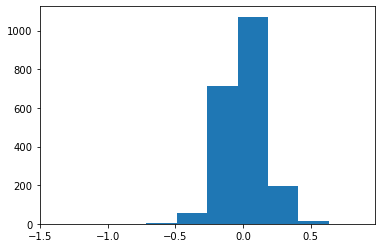

In [236]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(Features, logprice)
residuals = logprice - lm.predict(Features)
plt.hist(residuals)

In [238]:
print('R^2 is equal to %.3f' %(lm.score(Features, logprice)))
print('RSS is equal to %.3f' %(np.sum((logprice-lm.predict(Features))**2)))
print('The intercept is %.3f' %(lm.intercept_))

R^2 is equal to 0.841
RSS is equal to 48.923
The intercept is 5.380


In [239]:
print('negative slope column names %s' %(Features.columns[lm.coef_<0]))
print('positive slope column names %s' %(Features.columns[lm.coef_>0]))

negative slope column names Index(['YearRemodAdd', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_Po',
       'KitchenQual_TA', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po',
       'HeatingQC_TA', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_I (all)',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'OverallQual_2', 'Foundation_Slab',
       'Electrical_FuseF', 'Electrical_FuseP', 'Functional_Maj2',
       'Functional_Min1', 'Functional_Sal', 'Functional_Typ'],
      dtype='object')
positive slope column names Index(['YearBuilt', 'Y

In [242]:
import statsmodels.api as sm
x = sm.add_constant(Features)
model = sm.OLS(logprice, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     138.8
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        16:24:19   Log-Likelihood:                 937.85
No. Observations:                2064   AIC:                            -1722.
Df Residuals:                    1987   BIC:                            -1288.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.3442 

In [243]:
pValues = results.pvalues
print('The significant coefficients')
pValues[pValues<0.05]

The significant coefficients


const                   8.116811e-12
YearBuilt               5.898236e-05
YearRemodAdd            4.436696e-13
YearRemodAdd            4.436696e-13
PavedDrive              3.053199e-05
KitchenQual_Fa          2.904678e-10
KitchenQual_Gd          1.827940e-08
KitchenQual_TA          1.078121e-14
HeatingQC_Fa            4.987971e-02
HeatingQC_TA            4.089423e-03
CentralAir_Y            2.583846e-08
Fireplaces_1            4.698447e-33
Fireplaces_2            1.618455e-41
Fireplaces_3            1.578835e-06
MSZoning_C (all)        9.476300e-03
Neighborhood_ClearCr    1.896163e-02
Neighborhood_Edwards    2.710862e-02
Neighborhood_Gilbert    1.615553e-02
Neighborhood_GrnHill    2.459066e-05
Neighborhood_MeadowV    9.575441e-03
Neighborhood_NoRidge    2.080082e-04
Neighborhood_Sawyer     4.896682e-02
Neighborhood_StoneBr    1.955233e-02
BldgType_2fmCon         5.479065e-03
BldgType_Duplex         5.097677e-04
BldgType_Twnhs          2.181723e-15
BldgType_TwnhsE         2.178824e-20
O

In [244]:
print('The insignificant coefficients')
pValues[pValues>=0.05]

The insignificant coefficients


KitchenQual_Po          0.063560
HeatingQC_Gd            0.380123
HeatingQC_Po            0.385999
Fireplaces_4            0.209340
MSZoning_FV             0.215635
MSZoning_I (all)        0.485783
MSZoning_RH             0.186583
MSZoning_RL             0.270130
MSZoning_RM             0.184438
Neighborhood_Blueste    0.441249
Neighborhood_BrDale     0.122721
Neighborhood_BrkSide    0.145155
Neighborhood_CollgCr    0.227751
Neighborhood_Crawfor    0.061450
Neighborhood_Greens     0.618048
Neighborhood_IDOTRR     0.188236
Neighborhood_Landmrk    0.904853
Neighborhood_Mitchel    0.429515
Neighborhood_NAmes      0.151872
Neighborhood_NPkVill    0.880105
Neighborhood_NWAmes     0.769267
Neighborhood_NridgHt    0.106727
Neighborhood_OldTown    0.135632
Neighborhood_SWISU      0.110139
Neighborhood_SawyerW    0.103708
Neighborhood_Somerst    0.573943
Neighborhood_Timber     0.408116
Neighborhood_Veenker    0.053070
OverallQual_2           0.549791
Foundation_CBlock       0.087496
Foundation